In [1]:
pip install tensorflow

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:/traffic_signn')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [7]:
cur_path

'D:\\traffic_signn'

In [8]:
for i in range(classes):# 0 to 42
    path = os.path.join(cur_path,'train',str(i))#'D:\Traffic_Signn\Train\2'
    images = os.listdir(path)
    for a in images:#a set of images in the class
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [9]:
data = np.array(data)
labels = np.array(labels)

In [10]:
np.save(os.path.join('data.npy'), data)
np.save(os.path.join('target.npy'), labels)

In [11]:
data = np.load(os.path.join('data.npy'))
labels = np.load(os.path.join('target.npy'))

In [12]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 356s 357ms/step - loss: 1.9051 - accuracy: 0.4990 - val_loss: 0.5751 - val_accuracy: 0.8721
Epoch 2/20
981/981 [==============================] - 341s 348ms/step - loss: 0.6759 - accuracy: 0.8017 - val_loss: 0.1828 - val_accuracy: 0.9464
Epoch 3/20
981/981 [==============================] - 319s 325ms/step - loss: 0.3908 - accuracy: 0.8860 - val_loss: 0.1031 - val_accuracy: 0.9682
Epoch 4/20
981/981 [==============================] - 317s 323ms/step - loss: 0.3109 - accuracy: 0.9103 - val_loss: 0.0973 - val_accuracy: 0.9740
Epoch 5/20
981/981 [==============================] - 317s 323ms/step - loss: 0.2820 - accuracy: 0.9215 - val_loss: 0.0785 - val_accuracy: 0.9807
Epoch 6/20
981/981 [==============================] - 19133s 20s/step - loss: 0.2633 - accuracy: 0.9250 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 7/20
981/981 [==============================] - 438s 446ms/step - loss: 0.2246 - accuracy: 0.9374 - val_loss: 0.0617 -

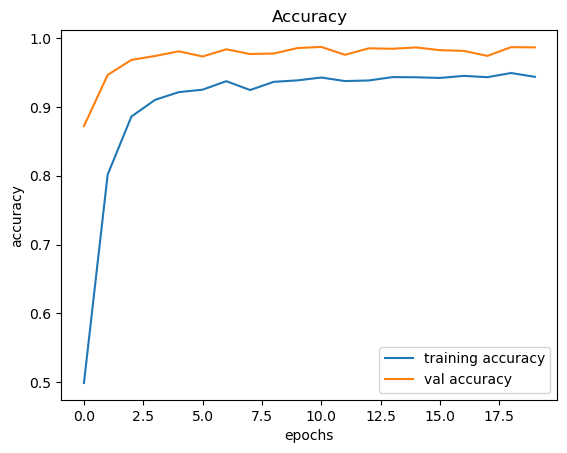

In [19]:
#accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


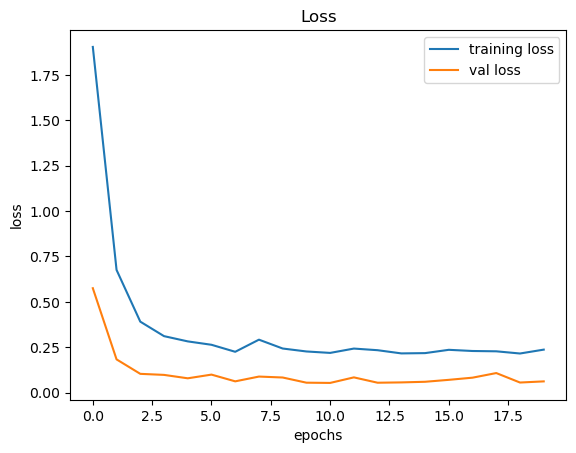

In [20]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [22]:
#import pandas as pd
X_test, label = testing('Test.csv')

In [23]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 34s 84ms/step


array([[7.2637403e-30, 3.5895949e-20, 6.6637794e-22, ..., 2.4740759e-18,
        7.2932989e-33, 1.8520334e-36],
       [2.3447468e-36, 1.0000000e+00, 4.8444611e-28, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.6167254e-05, 5.1087397e-01, 3.7318981e-01, ..., 2.0268621e-06,
        2.4139238e-06, 4.0064239e-07],
       [1.4232964e-18, 9.6891455e-09, 5.1869801e-08, ..., 2.6607718e-11,
        1.0184201e-23, 3.2554087e-12],
       [5.1487202e-30, 1.3211289e-18, 5.8410534e-16, ..., 4.3916570e-21,
        2.7411515e-28, 1.5211373e-19]], dtype=float32)

In [40]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#Y_pred=model.predict(X_test)
#accuracy=accuracy_score(Y_test,Y_pred)
#from sklearn.metrics import accuracy_score

# Y_pred=model.predict(X_test)
# accuracy=accuracy_score(Y_test,Y_pred)
#print(accuracy)

In [41]:
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming label and Y_pred are arrays containing discrete class labels
# If Y_pred contains probabilities or continuous values, you need to convert them to discrete class labels
# For example:
Y_pred_discrete = np.argmax(Y_pred, axis=1)  # For multiclass classification with probabilities
 #Y_pred_discrete = np.where(Y_pred >= threshold, 1, 0)  # For binary classification with probabilities

# Then, you can calculate accuracy
accuracy = accuracy_score(label, Y_pred_discrete)  # Use Y_pred_discrete if Y_pred was converted
print("Accuracy:", accuracy)


Accuracy: 0.95027711797308


In [42]:
model.save("./training/Tr.h5")

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
import os
os.chdir(r'D:\Traffic_Signn')
from keras.models import load_model
model = load_model('./training/Tr.h5')

In [44]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 85ms/step
Predicted traffic sign is:  Speed limit (120km/h)


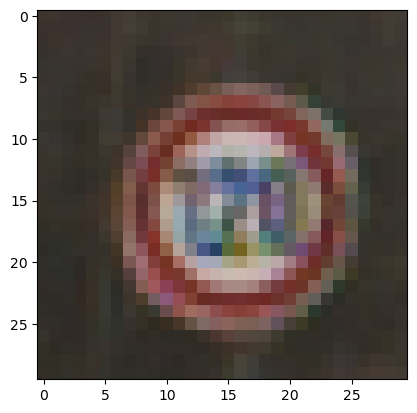

In [53]:
plot,prediction = test_on_img(r'D:\Traffic_Signn\Test\00571.png')
s = [str(i) for i in prediction] 
a = np.argmax(prediction)
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()